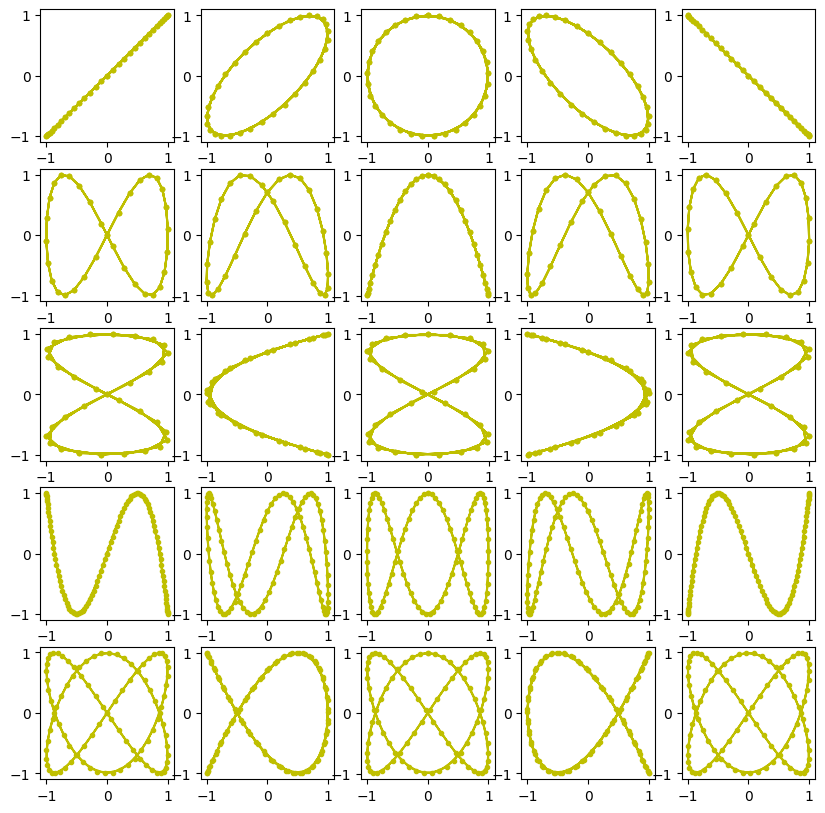

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

'''
x - 1st signal,
y - 2nd signal

plot it
'''

freq = np.pi * 2

def xSignal(t, freq):

  return np.sin(t * freq)

def ySignal(t, freq, phaseShift):

  return np.sin(t * freq + phaseShift)

numOfSamples = 100
minT = 0
maxT = 6
tArray = np.linspace(minT, maxT, numOfSamples)

phaseShifts = np.array([0., 1./4, 1./2, 3./4, 1.]) * np.pi
phaseLen = len(phaseShifts)

freqRatios = np.array([1, 1 / 2, 2 / 1, 1 / 3, 2 / 3])
freqLen = len(freqRatios)

fig, axs = plt.subplots(freqLen, phaseLen, figsize = (10, 10))

for freqRatioIndex in range(freqLen):

  for phaseIndex in range(phaseLen):

    xList = [xSignal(t, freq * freqRatios[freqRatioIndex]) for t in tArray]
    yList = [ySignal(t, freq, phaseShifts[phaseIndex]) for t in tArray]

    axs[freqRatioIndex][phaseIndex].plot(xList, yList, '.-y')

In [12]:
sizeOfMatrix = 10

A = np.diag([2.] * sizeOfMatrix) + np.diag([-1.] * (sizeOfMatrix-1), 1) + np.diag([-1.] * (sizeOfMatrix-1), -1)
B = np.zeros(shape = (sizeOfMatrix,))

B[0] = 100
B[sizeOfMatrix-1] = 1

print(A)
print(B)
print(np.linalg.solve(A, B))

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
[100.   0.   0.   0.   0.   0.   0.   0.   0.   1.]
[91. 82. 73. 64. 55. 46. 37. 28. 19. 10.]


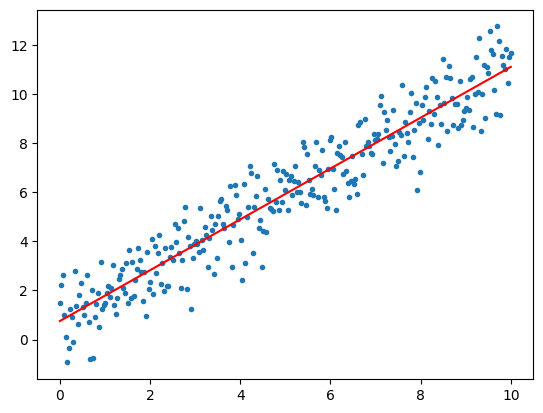

In [13]:
a = 1
b = 1

xs = np.linspace(0,10, 300)

ys = [a * x + b + np.random.standard_normal() for x in xs]

p_normal = np.polyfit(xs, ys, 1)
ys_normal = xs * p_normal[0] + p_normal[1]

plt.scatter(xs, ys, marker = '.')
plt.plot(xs, ys_normal, color = 'r')

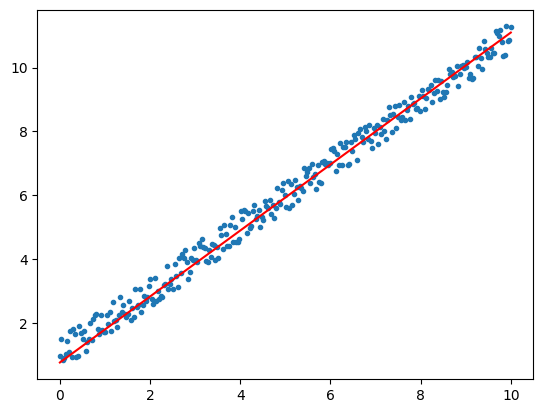

In [15]:
a = 1
b = 1

xs = np.linspace(0,10, 300)

ys = [a * x + b + np.random.rand() - 0.5 for x in xs]

p_uniform = np.polyfit(xs, ys, 1)
ys_uniform = xs * p_uniform[0] + p_uniform[1]

plt.scatter(xs, ys, marker = '.')
plt.plot(xs, ys_normal, color = 'r')

(array([  7.,  28.,  60., 142., 242., 245., 155.,  84.,  28.,   9.]),
 array([-3.1576246 , -2.52938415, -1.90114369, -1.27290323, -0.64466277,
        -0.01642232,  0.61181814,  1.2400586 ,  1.86829906,  2.49653952,
         3.12477997]),
 <BarContainer object of 10 artists>)

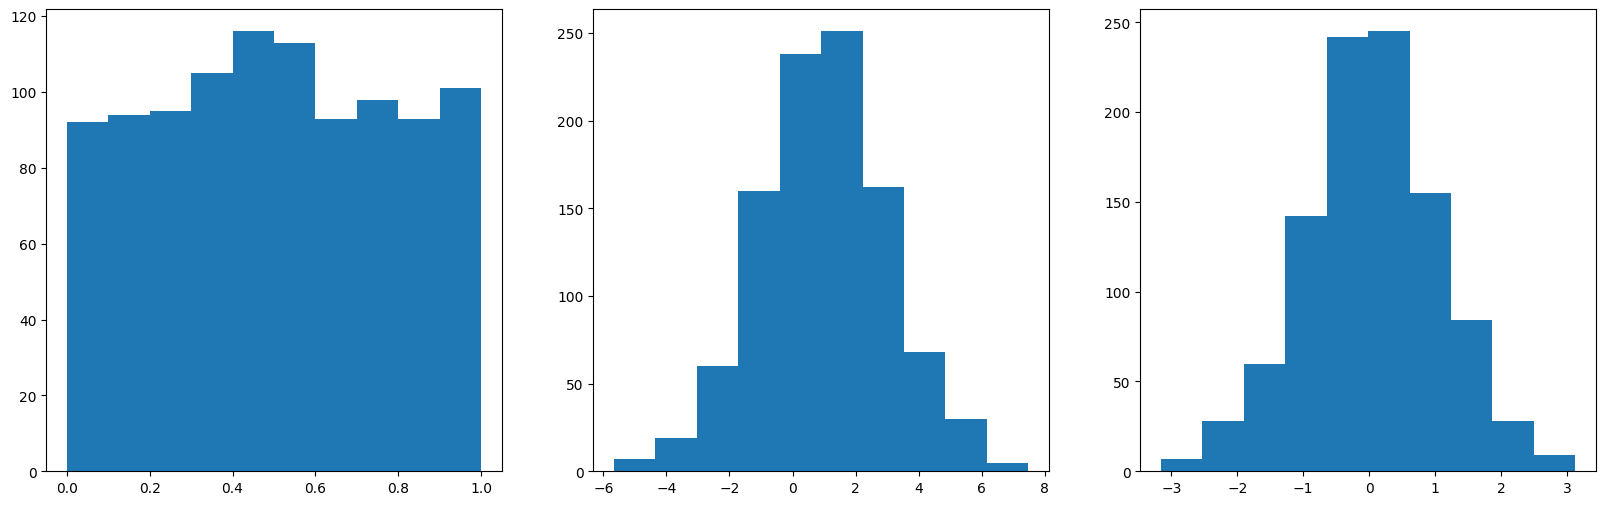

In [27]:
numOfRandomValues = 1000

uniformValues = [np.random.rand() for i in range(numOfRandomValues)]
standardNormalValues = [np.random.standard_normal() for i in range(numOfRandomValues)]
normalValues = [np.random.normal(1, 2) for i in range(numOfRandomValues)]

fig, axs = plt.subplots(1, 3, figsize = (20, 6))

axs[0].hist(uniformValues)
axs[1].hist(normalValues)
axs[2].hist(standardNormalValues)

12


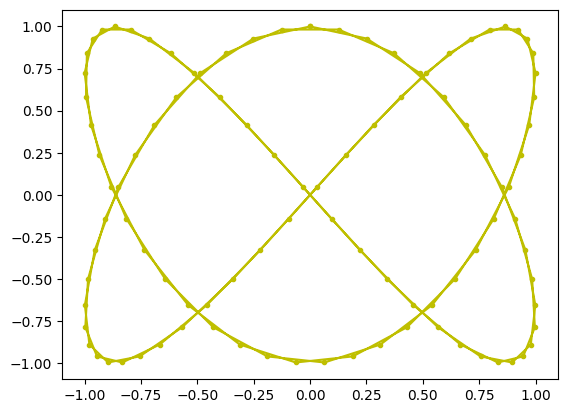

In [31]:
'''

  0 < t1, t2 < 2pi

  y: sin(w * t1) = sin(w * t2)
  x: sin(w * t1 + alfa) = sin(w * t2 + alfa)

  [w * t1 = w * t2 + 2 * pi * k
  [w * t1 = pi - w * t2 + 2 * pi * k
 |
<
 |
  [w * t1 + alfa = w * t1 + alfa + 2 * pi * k
  [w * t1 + alfa = pi - w * t1 + alfa + 2 * pi * k



'''

def findIntersections(freq, ratio, shift):

  intersections = []

  for k in range(-10, 10):

    t1 = (2 * np.pi * k - shift) / (freq * (1 - ratio))
    t2 = (np.pi - shift + 2 * np.pi * k) / (freq * (1 + ratio))

    if 0 <= t1 <= 2 * np.pi:
      intersections.append(t1)

    if 0 <= t2 <= 2 * np.pi:
      intersections.append(t2)

  return intersections

freq = 2 * np.pi
freqRatio = 2 / 3
phaseShift = np.pi / 2

xList = [xSignal(t, freq * freqRatio) for t in tArray]
yList = [ySignal(t, freq, phaseShift) for t in tArray]

print(len(findIntersections(freq, freqRatio, phaseShift)))

plt.plot(xList, yList, '.-y')